# Fold Change Gridplots Using UCSF Subset

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.stats import pearsonr
import seaborn as sns
import pickle
sns.set_style('whitegrid')

from rnaseq_lib.utils import mkdir_p
from rnaseq_lib.de import get_l2fc
from rnaseq_lib.utils.tissues import return_samples

In [55]:
samples = return_samples()
normal_tissues = sorted([x for x in samples if any([y for y in samples[x] if y.endswith('11')])])

df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)

In [56]:
gene_map = pickle.load(open('../gene_map.pickle', 'rb'))
genes = [gene_map[x.split('.')[0]] for x in df.index]
df.index = genes

ucsf_genes = sorted([x.strip() for x in open('../UCSF-RNAPanel-Final-412-genes.csv', 'r').readlines()])
ucsf_genes = [x for x in ucsf_genes if x in df.index]

df = df.loc[ucsf_genes]
print df.shape

(405, 18273)


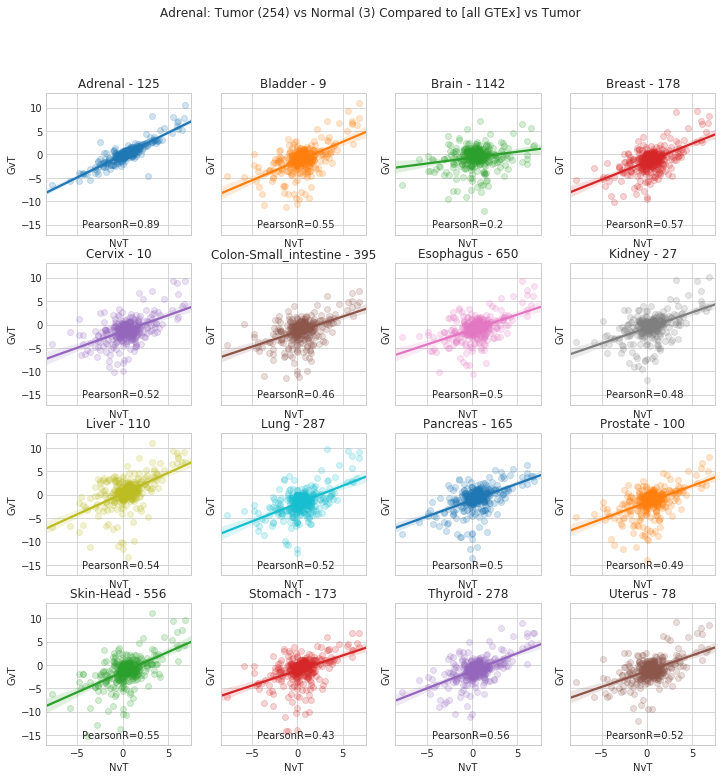

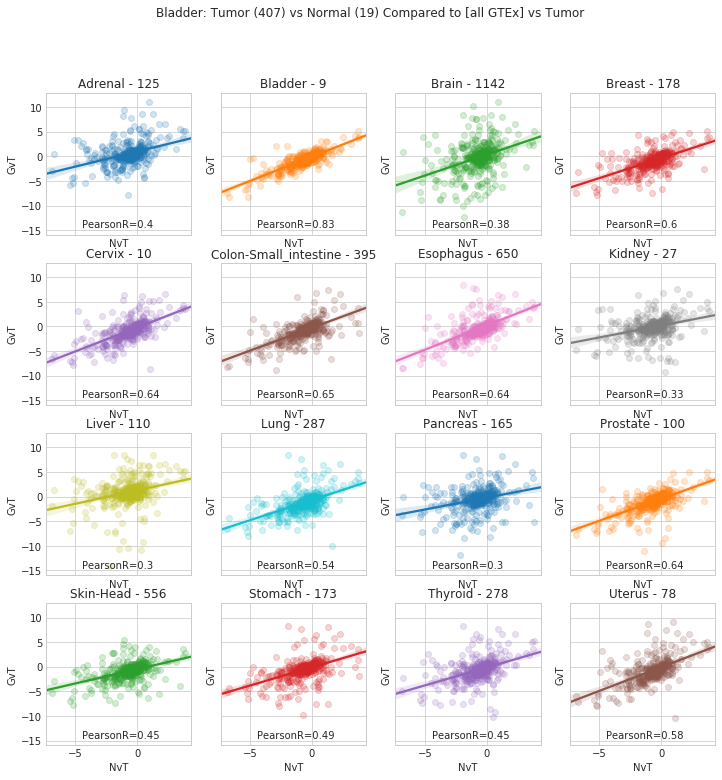

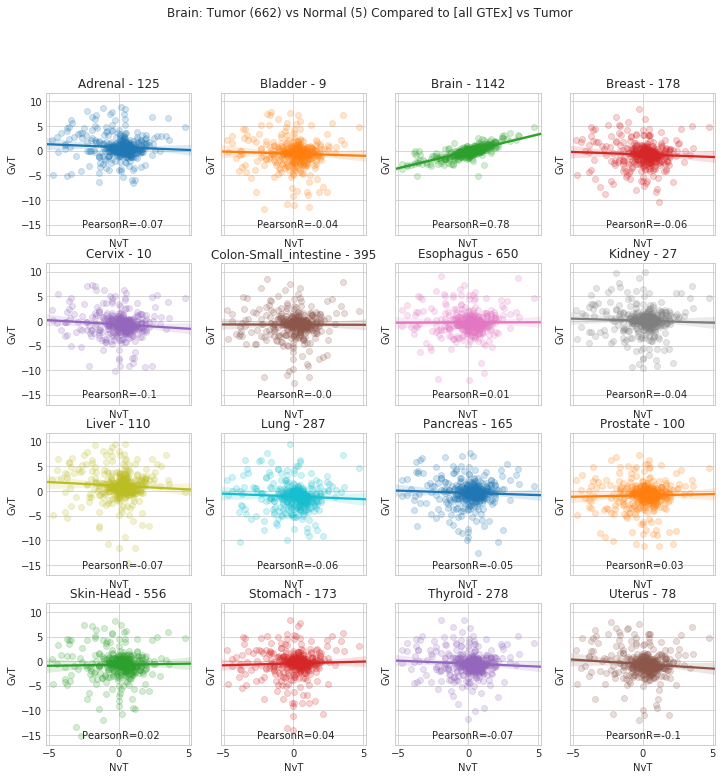

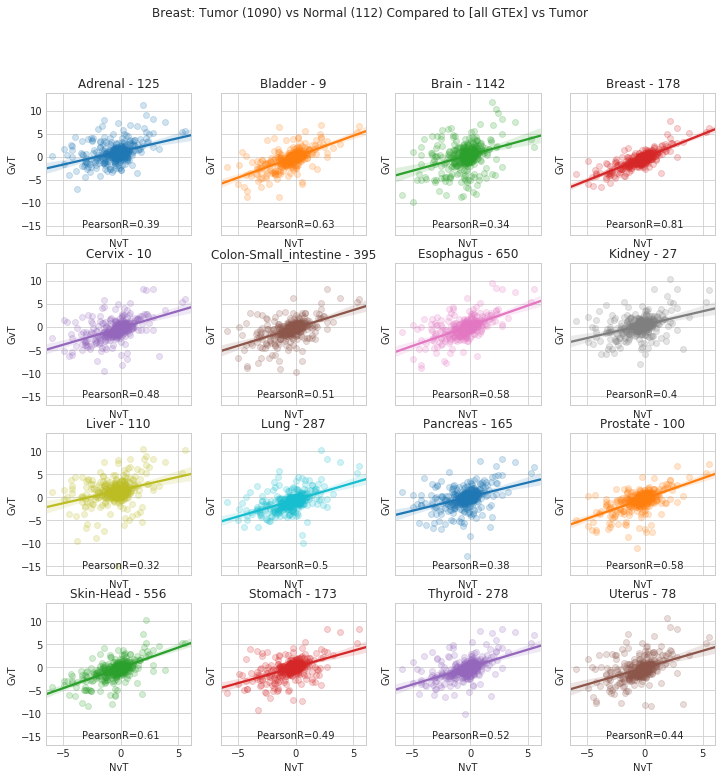

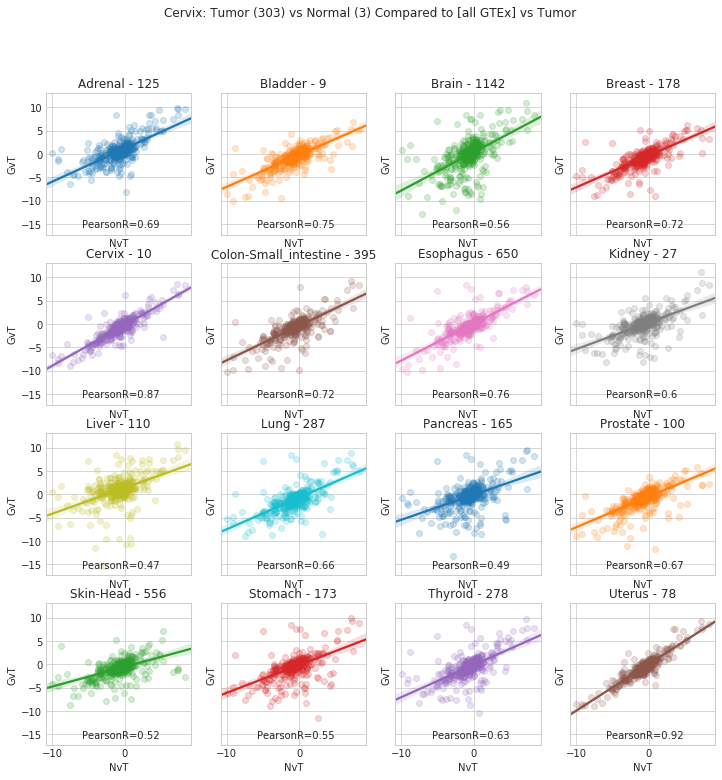

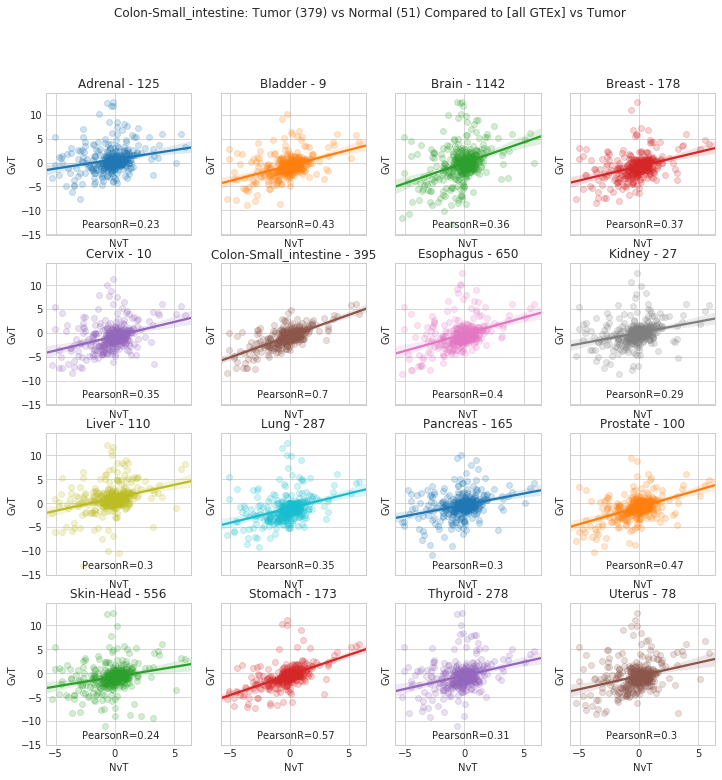

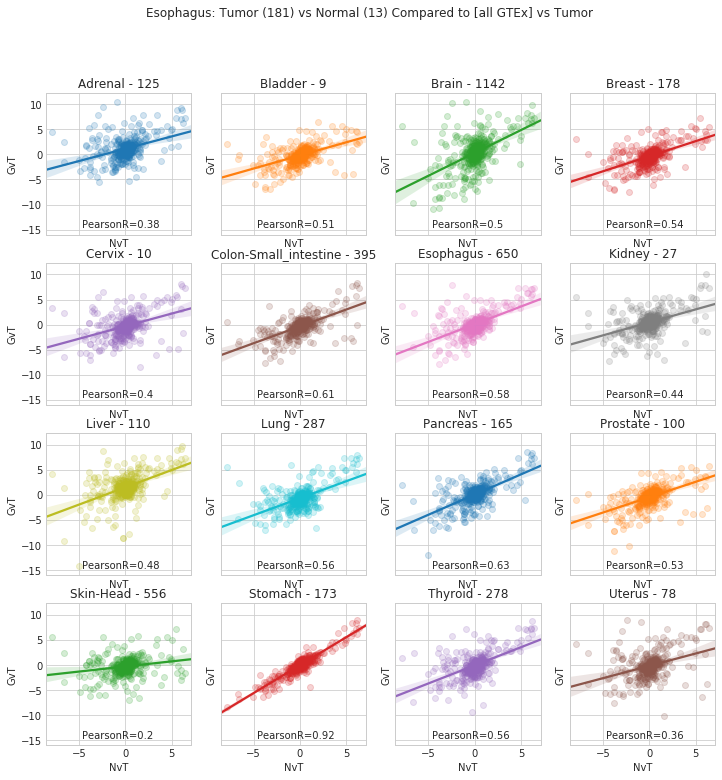

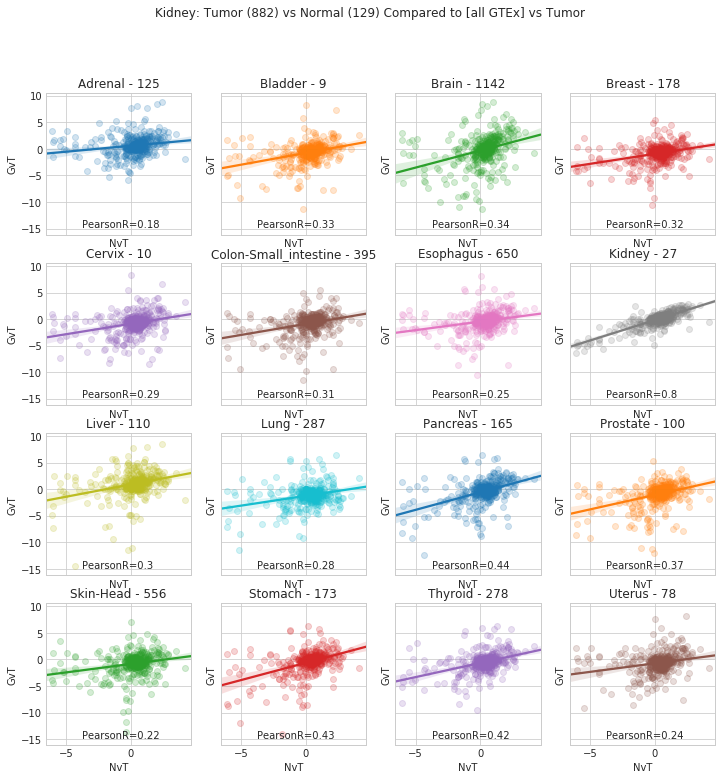

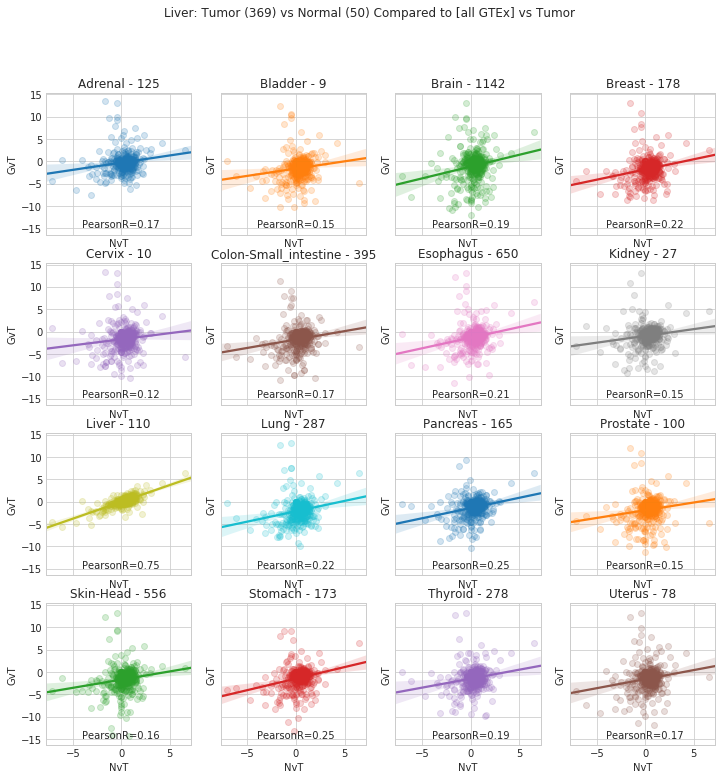

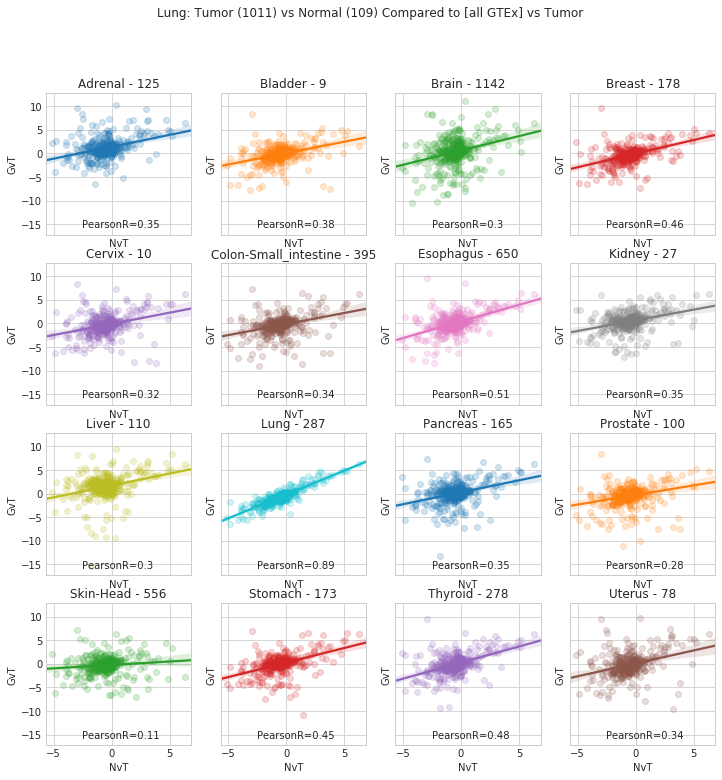

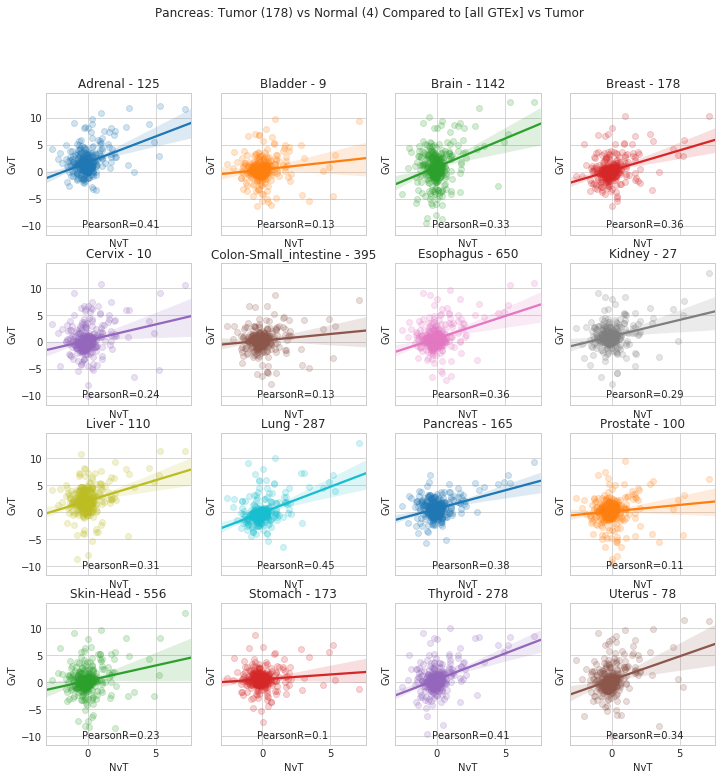

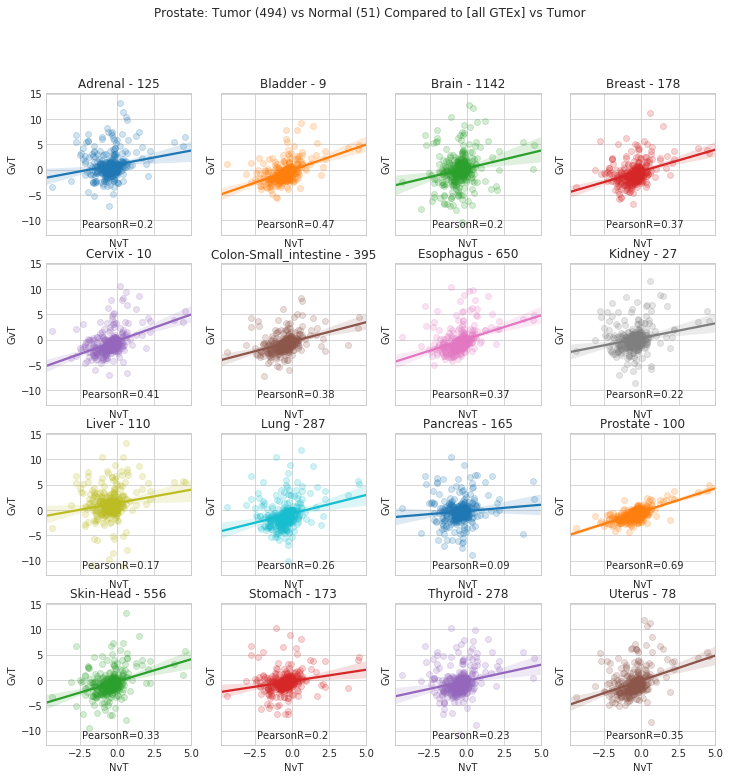

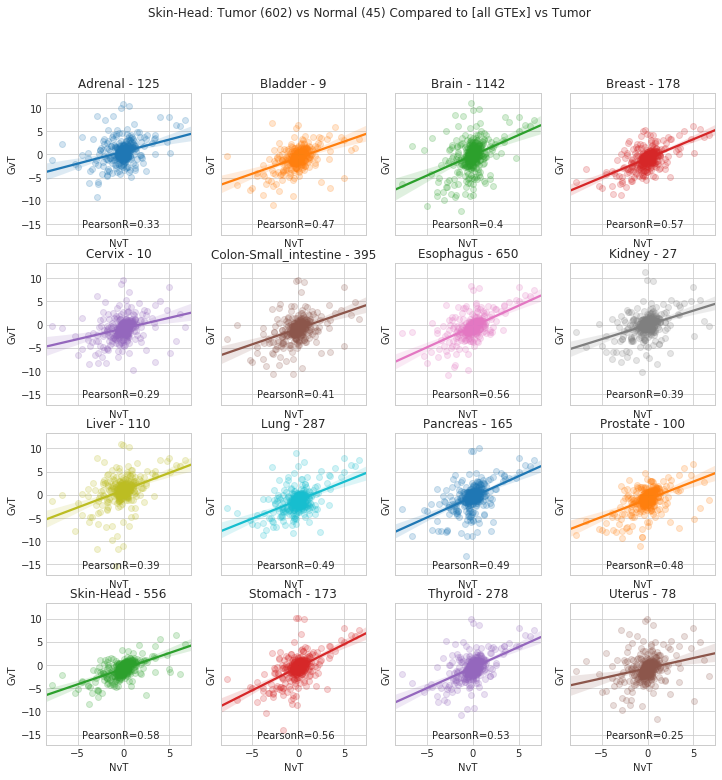

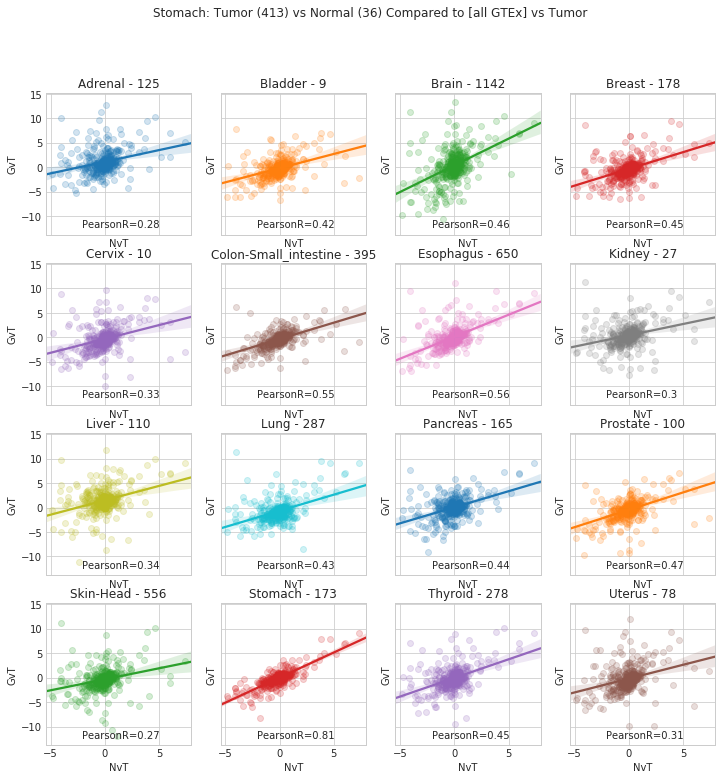

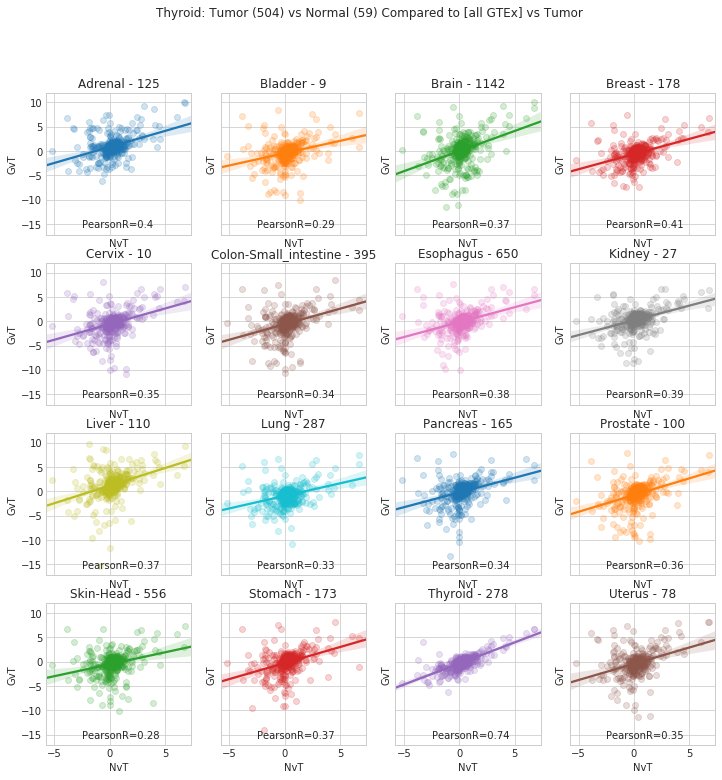

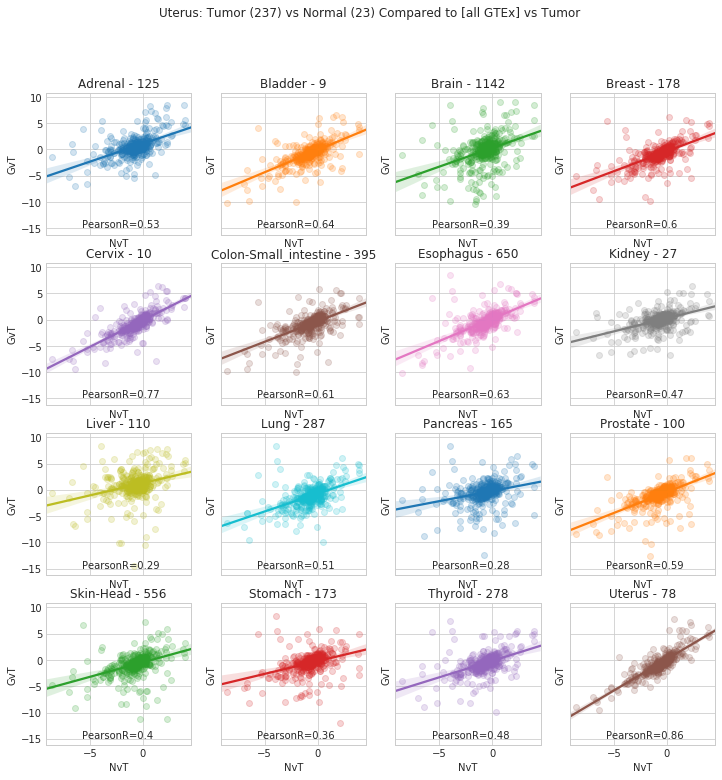

In [57]:
for tissue in normal_tissues:
    # Select GTEx, Tumor, and Normal samples
    t = list(set([x for x in samples[tissue] if x.startswith('TCGA') and x.endswith('01')]))
    n = list(set([x for x in samples[tissue] if x.startswith('TCGA') and x.endswith('11')]))
    
    # Compute l2fc for normal vs. tumor
    t_med = df[t].median(axis=1)
    n_med = df[n].median(axis=1)
    nt_l2fc = get_l2fc(n_med, t_med)
    
    # Define plotting information for this tissue
    f, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 12))
    ax = ax.flatten()
    plt.suptitle('{}: Tumor ({}) vs Normal ({}) Compared to [all GTEx] vs Tumor'.format(tissue, len(t), len(n)))
    for i, tissue2 in enumerate(normal_tissues):
        # Compute l2fc between tissue2 GTEx and Tumor
        g = list(set([x for x in samples[tissue2] if not x.startswith('TCGA')]))
        g_med = df[g].median(axis=1)
        gt_l2fc = get_l2fc(g_med, t_med)
        pr = round(pearsonr(nt_l2fc, gt_l2fc)[0], 2)
        
        # Plot
        sns.regplot(x=nt_l2fc, y=gt_l2fc, scatter_kws={'alpha': 0.2}, ax=ax[i])
        ax[i].set_xlabel('NvT')
        ax[i].set_ylabel('GvT')
        ax[i].set_title('{} - {}'.format(tissue2, len(g)))
        ax[i].text(0.25, 0.05, 'PearsonR={}'.format(pr), transform=ax[i].transAxes)
    plt.show()

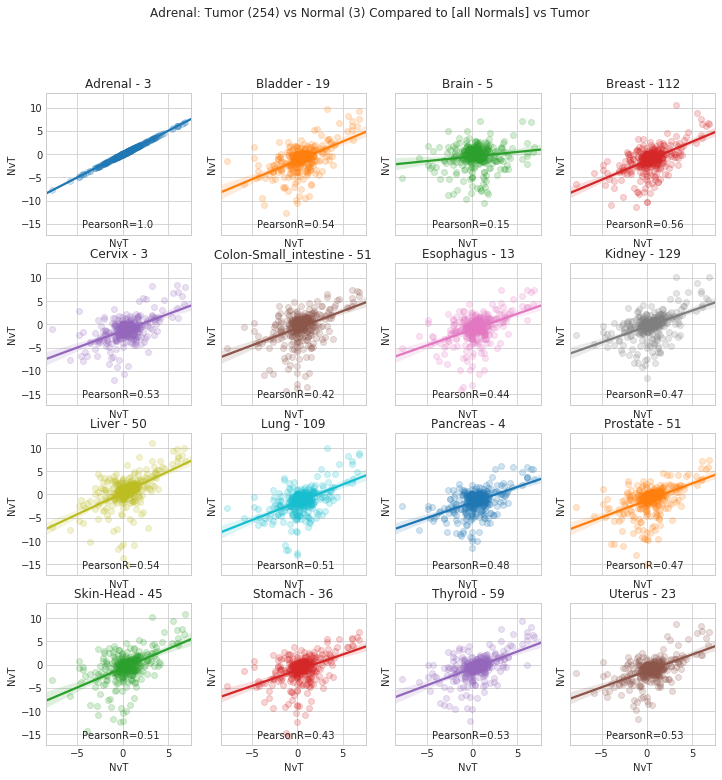

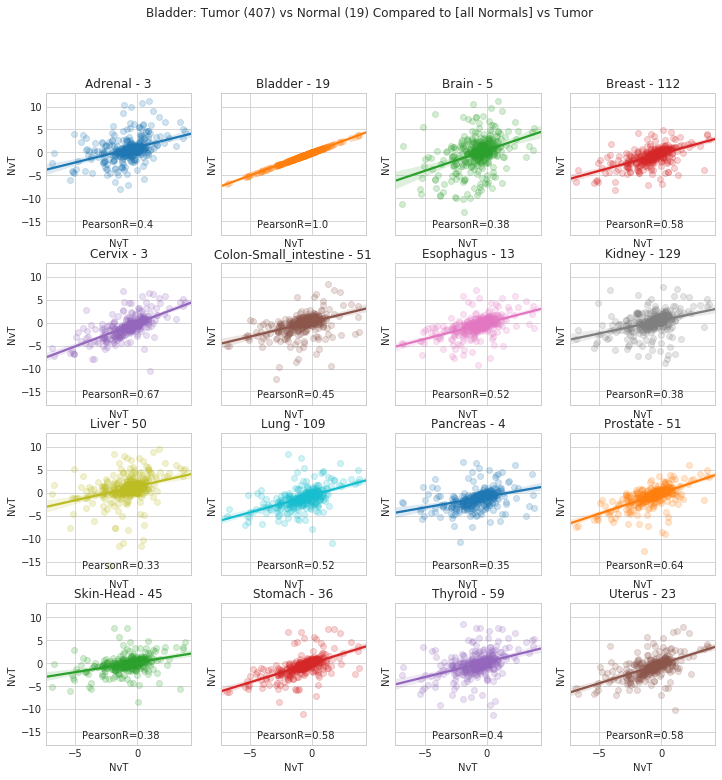

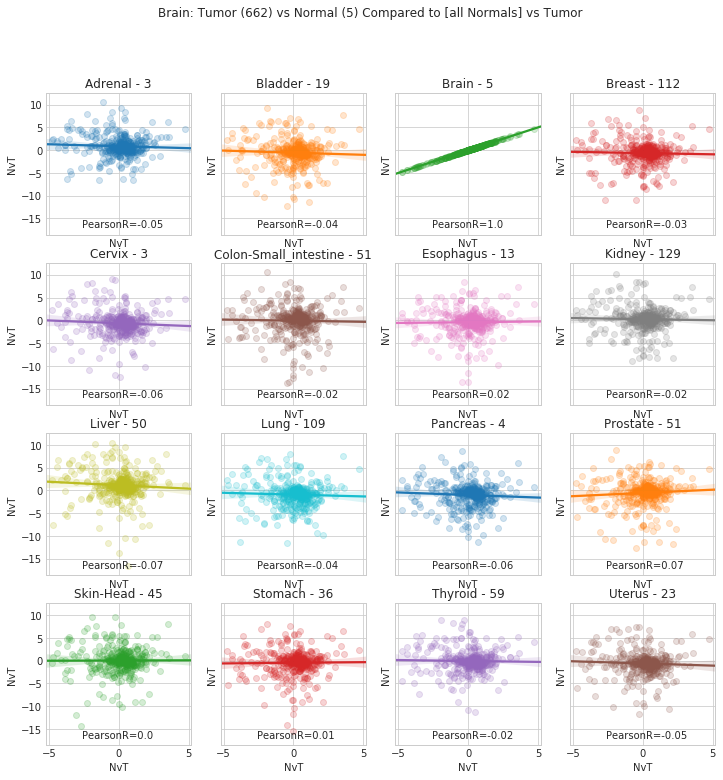

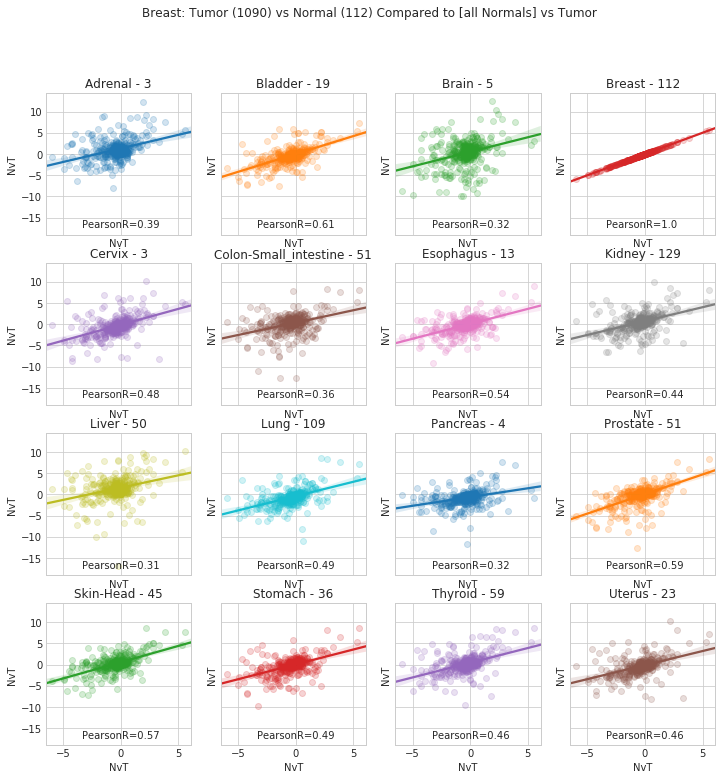

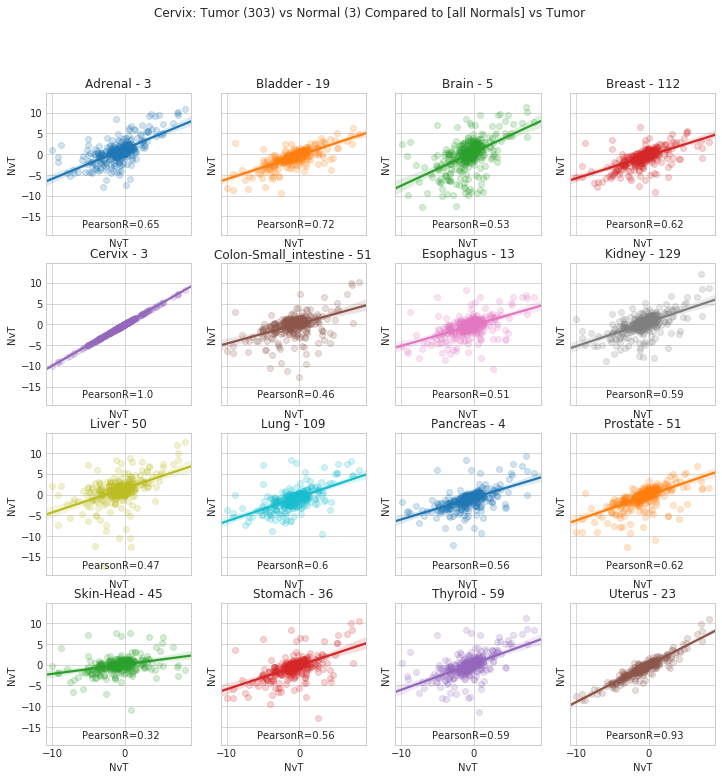

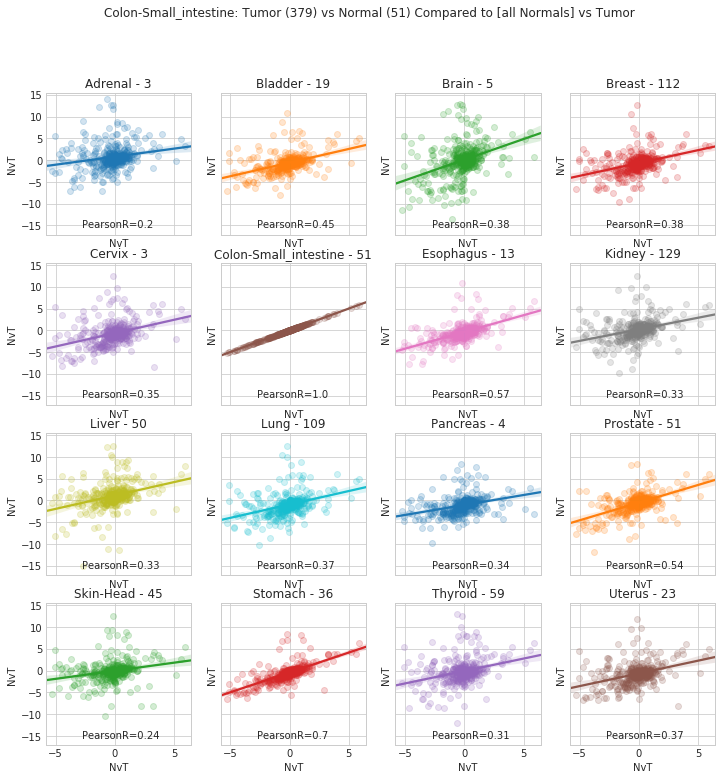

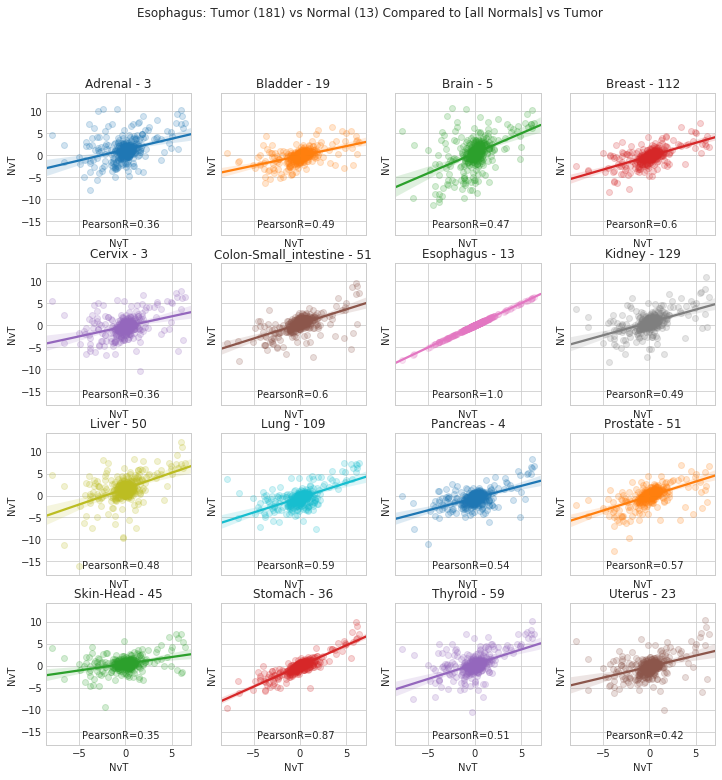

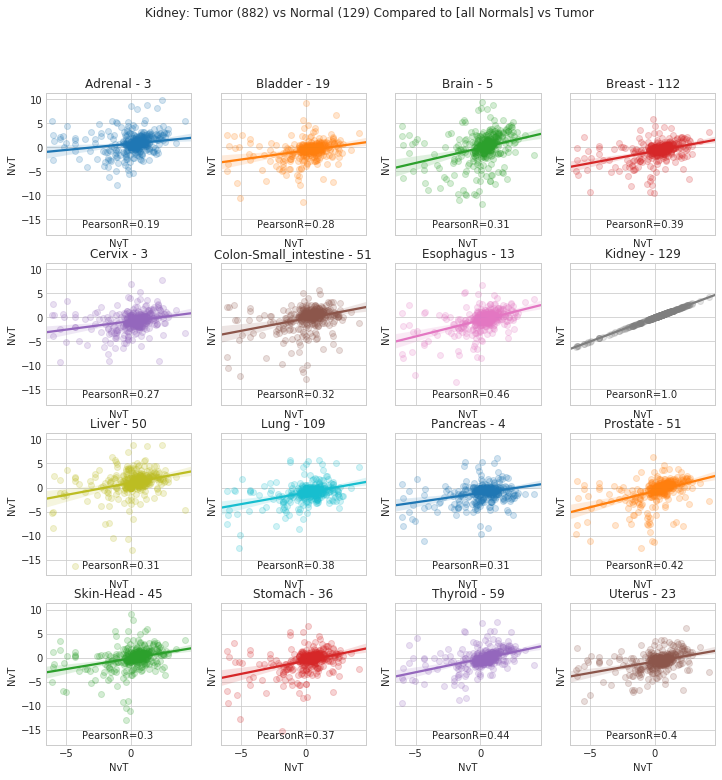

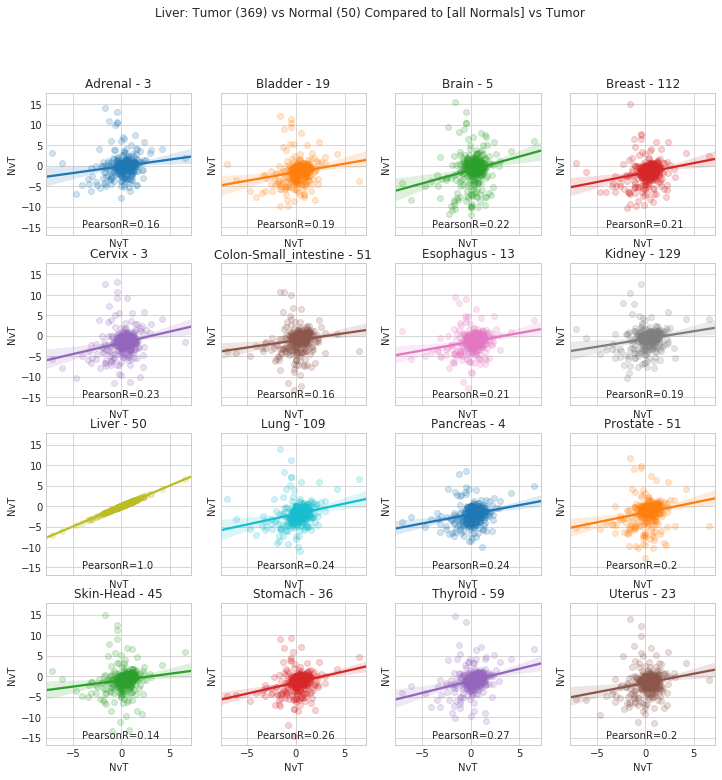

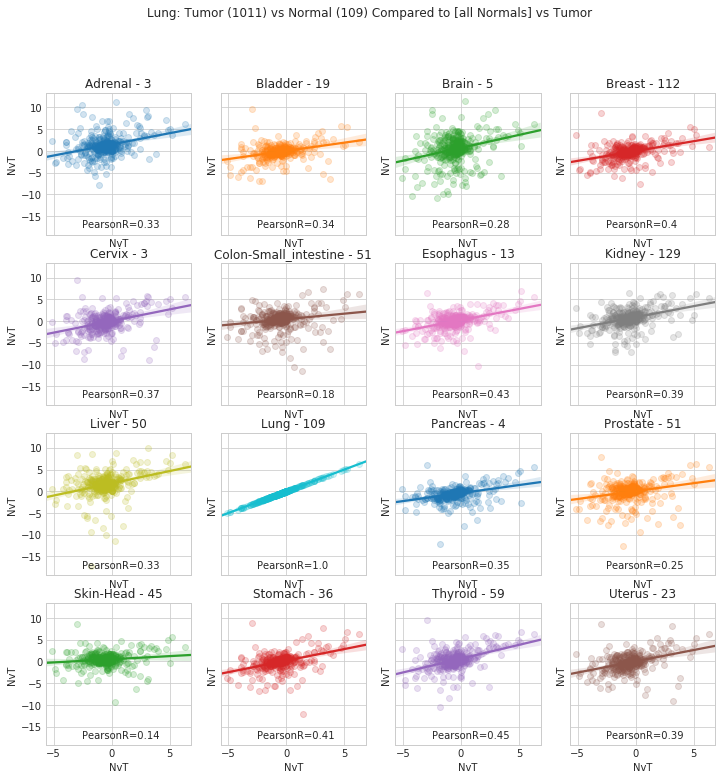

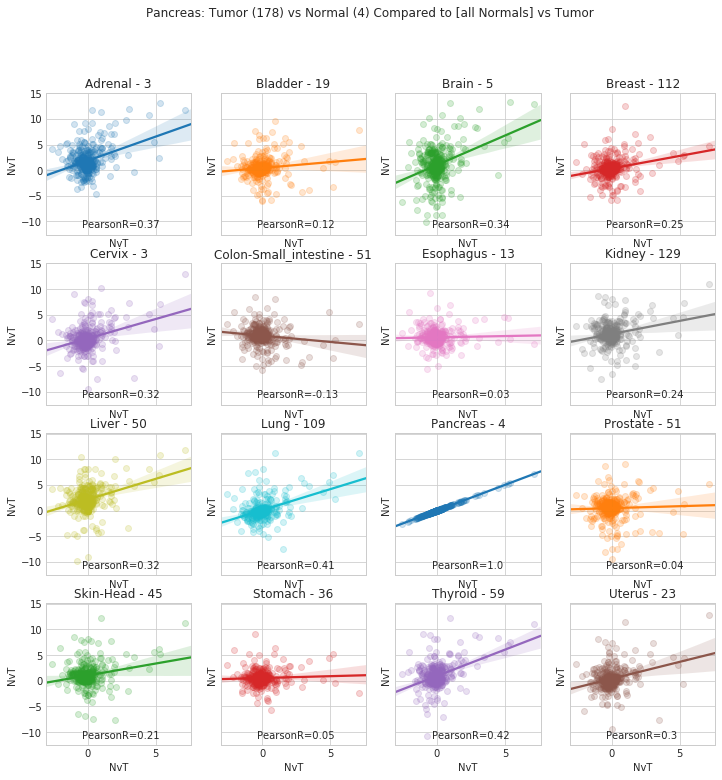

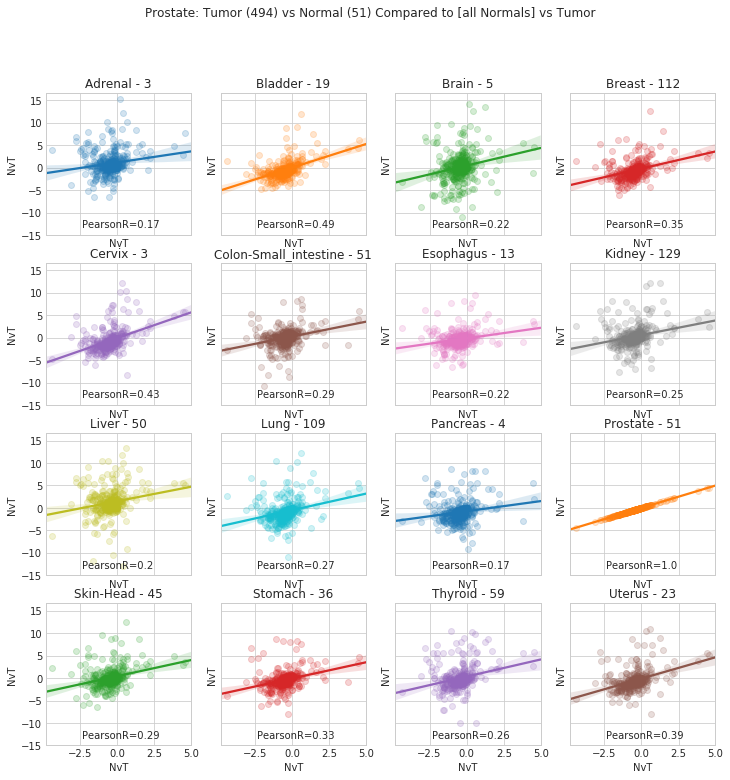

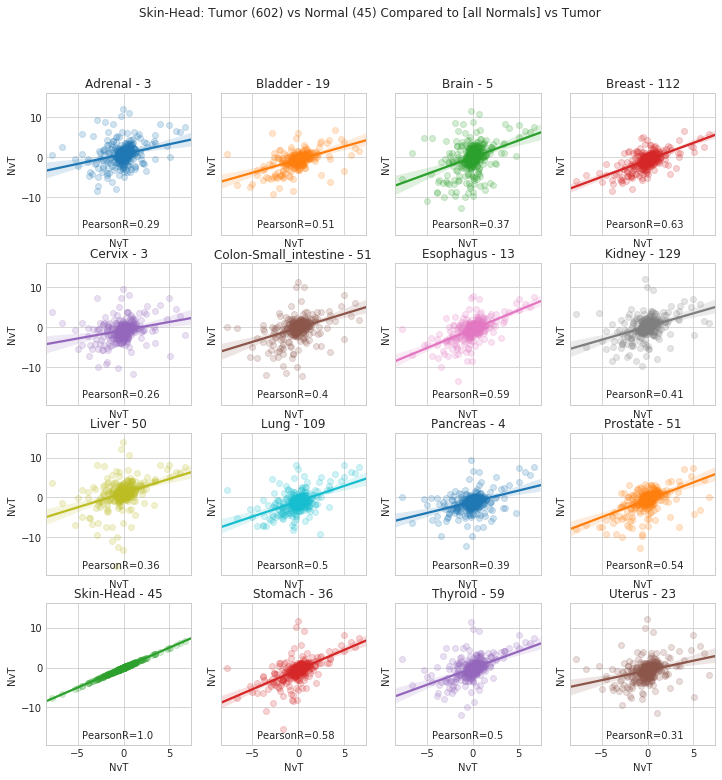

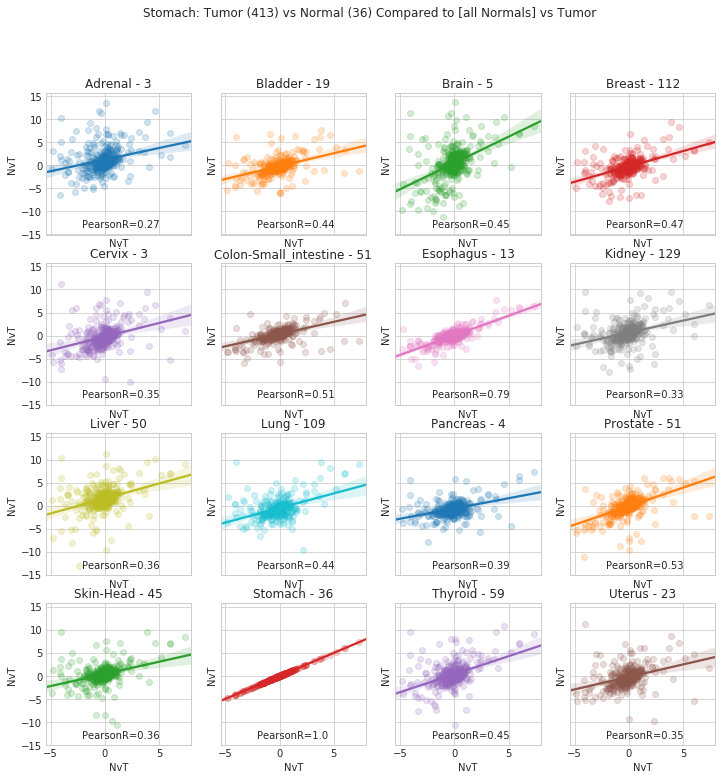

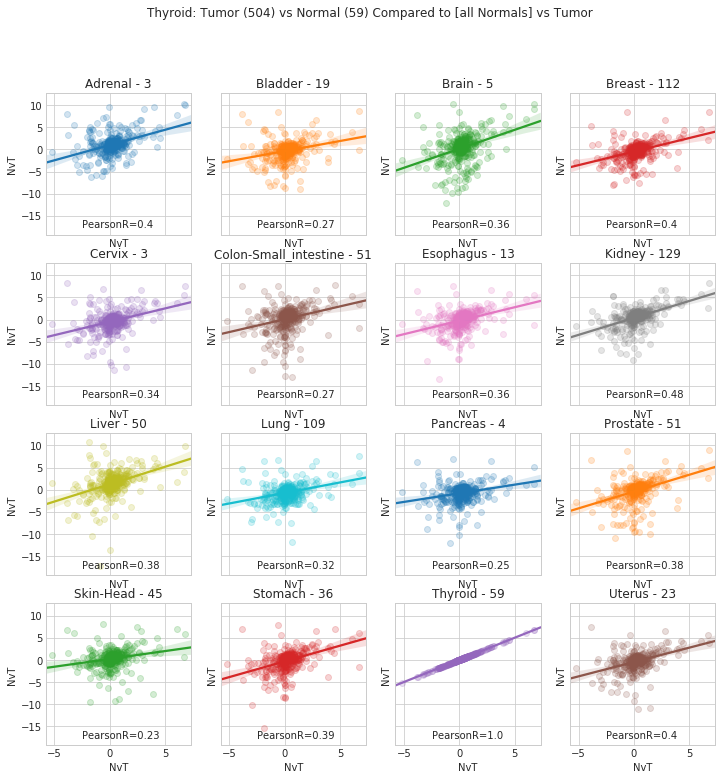

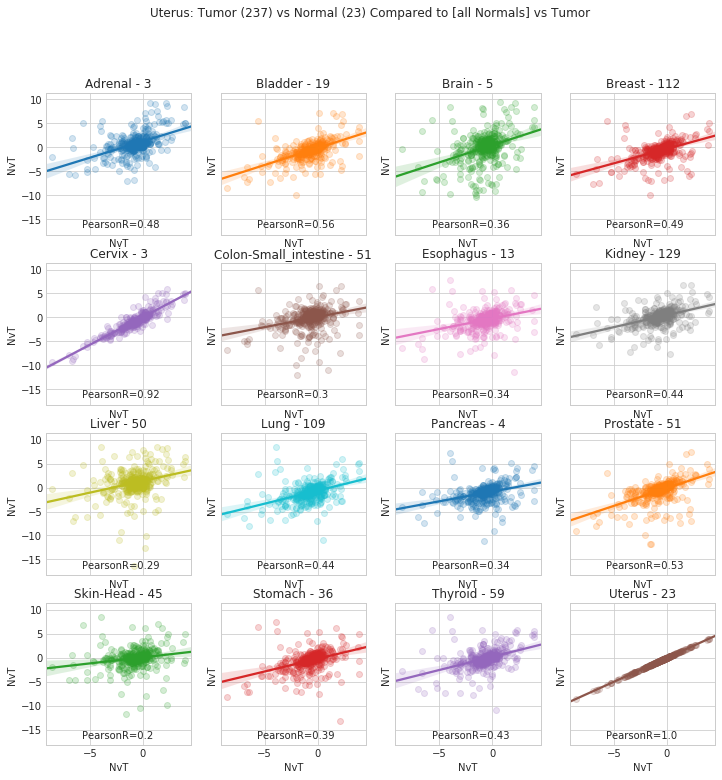

In [58]:
for tissue in normal_tissues:
    # Select GTEx, Tumor, and Normal samples
    t = list(set([x for x in samples[tissue] if x.startswith('TCGA') and x.endswith('01')]))
    n = list(set([x for x in samples[tissue] if x.startswith('TCGA') and x.endswith('11')]))
    
    # Compute l2fc for normal vs. tumor
    t_med = df[t].median(axis=1)
    n_med = df[n].median(axis=1)
    nt_l2fc = get_l2fc(n_med, t_med)
    
    # Define plotting information for this tissue
    f, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 12))
    ax = ax.flatten()
    plt.suptitle('{}: Tumor ({}) vs Normal ({}) Compared to [all Normals] vs Tumor'.format(tissue, len(t), len(n)))
    for i, tissue2 in enumerate(normal_tissues):
        # Compute l2fc between tissue2 New Normal and Tumor
        g = list(set([x for x in samples[tissue2] if x.startswith('TCGA') and x.endswith('11')]))
        g_med = df[g].median(axis=1)
        gt_l2fc = get_l2fc(g_med, t_med)
        pr = round(pearsonr(nt_l2fc, gt_l2fc)[0], 2)
        
        # Plot
        sns.regplot(x=nt_l2fc, y=gt_l2fc, scatter_kws={'alpha': 0.2}, ax=ax[i])
        ax[i].set_xlabel('NvT')
        ax[i].set_ylabel('NvT')
        ax[i].set_title('{} - {}'.format(tissue2, len(g)))
        ax[i].text(0.25, 0.05, 'PearsonR={}'.format(pr), transform=ax[i].transAxes)
    plt.show()